In [2]:
import numpy as np
import math
from numpy import linalg as LA
import matplotlib.pyplot as plt

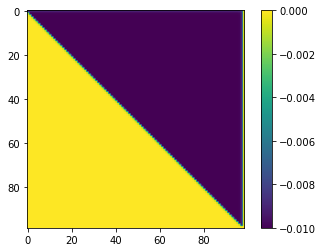

Text(0.5, 1.0, 'Upwind discretization of the advection term')

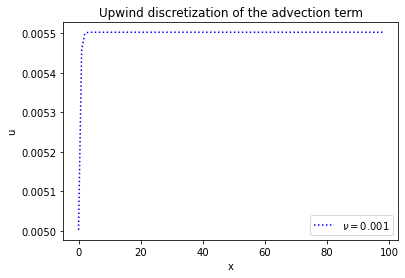

In [4]:
nu = 0.001
N = 100
h = 1.0 / N
A = np.zeros(shape=(N-1,N-1))
for i in range(0,N-2):
    A[i,i] = -(2.0*nu/h**2 + 1.0/h)
    A[i+1,i] = nu/h**2
    A[i,i+1] = nu/h**2 + 1.0/h
A[N-2,N-2] = -(2.0/h**2 + nu/h)

Ainv = LA.inv(A)
plt.imshow(Ainv)
plt.colorbar()
plt.show()
# print(Ainv)

b = np.zeros(N-1)
b[N-2] = -(nu/h**2 + 1.0/h)

u = LA.solve(A,b)
np.allclose(np.dot(A, u), b)

plt.plot(range(0,len(u)), u, 'b:',label=r'$\nu=0.001$')
plt.xlabel("x")
plt.ylabel("u")
plt.legend(loc='best')
plt.title("Upwind discretization of the advection term")

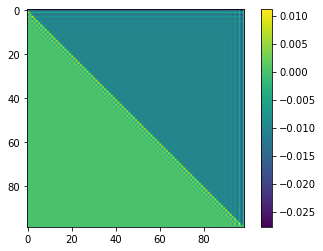

[[-1.66666667e-02 -1.66666667e-02 -1.66666667e-02 ... -9.29622237e-03
  -2.77223331e-02 -8.31669993e-05]
 [ 1.11111111e-02 -5.55555556e-03 -5.55555556e-03 ... -3.09874079e-03
  -9.24077770e-03 -2.77223331e-05]
 [-7.40740741e-03  3.70370370e-03 -1.29629630e-02 ... -7.23039518e-03
  -2.15618146e-02 -6.46854439e-05]
 ...
 [-1.15756566e-19  5.78782830e-20 -2.02573990e-19 ... -5.57773342e-03
  -1.66333999e-02 -4.99001996e-05]
 [ 2.30132338e-19 -1.15066169e-19  4.02731591e-19 ...  1.10889332e-02
  -1.66333999e-02 -4.99001996e-05]
 [-4.60264676e-22  2.30132338e-22 -8.05463182e-22 ... -2.21778665e-05
   3.32667997e-05 -4.99001996e-05]]


Text(0.5, 1.0, 'Central discretization of the advection term')

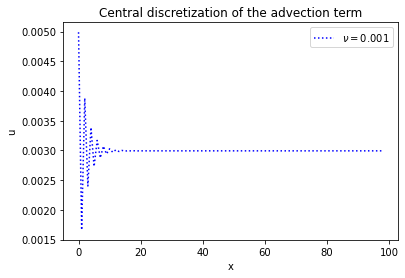

In [5]:
nu = 0.001
N = 100
h = 1.0 / N
A = np.zeros(shape=(N-1,N-1))
for i in range(0,N-2):
    A[i,i] = -(2.0*nu/h**2)
    A[i+1,i] = nu/h**2 - 1.0/(2*h)
    A[i,i+1] = nu/h**2 + 1.0/(2*h)
A[N-2,N-2] = -(2.0/h**2)

Ainv = LA.inv(A)
plt.imshow(Ainv)
plt.colorbar()
plt.show()
print(Ainv)

b = np.zeros(N-1)
b[N-2] = -(nu/h**2 + 1.0/(2*h))

u = LA.solve(A,b)
np.allclose(np.dot(A, u), b)

plt.plot(range(0,len(u)), u, 'b:',label=r'$\nu=0.001$')
plt.xlabel("x")
plt.ylabel("u")
plt.legend(loc='best')
plt.title("Central discretization of the advection term")